In [13]:
# Importing essential libraries for data handling, visualization, and modeling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import warnings

In [14]:
# Suppress all warnings to keep output clean
warnings.filterwarnings("ignore")

In [15]:
# Load dataset from Kaggle using kagglehub
import kagglehub
import os

path = kagglehub.dataset_download("thedevastator/uncovering-factors-that-affect-used-car-prices")
csv_files = [file for file in os.listdir(path) if file.endswith(".csv")]
df = pd.read_csv(os.path.join(path, csv_files[0]))
df

100%|██████████| 18.2M/18.2M [00:01<00:00, 13.0MB/s]

Extracting files...


,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,...,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,...,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,...,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,...,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [16]:
# View the shape of the dataset
df.shape

(371528, 21)

In [17]:
# Count missing values in each column
df.isnull().sum()

,0
index,0
dateCrawled,0
name,0
seller,0
offerType,0
price,0
abtest,0
vehicleType,37869
yearOfRegistration,0
gearbox,20209


In [18]:
# Calculate the percentage of missing values in each column of the used car DataFrame
persentage_of_missing = df.isnull().sum().sort_values(ascending=False) * 100 / len(df)
persentage_of_missing

,0
notRepairedDamage,19.395577
vehicleType,10.192771
fuelType,8.986133
model,5.513447
gearbox,5.439429
offerType,0.000000
seller,0.000000
name,0.000000
dateCrawled,0.000000
index,0.000000


In [19]:
# Dataset structure overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

In [20]:
# Convert date columns to datetime and extract useful components
def convert_to_datetime(df, date_cols):
    for col in date_cols:
        df[col] = pd.to_datetime(df[col])
        df[f'{col}_year'] = df[col].dt.year
        df[f'{col}_month'] = df[col].dt.month
        df[f'{col}_day'] = df[col].dt.day
        df[f'{col}_hour'] = df[col].dt.hour

    df.drop(columns=date_cols, inplace=True)
    return df

date_cols = ['dateCrawled', 'dateCreated', 'lastSeen']
convert_to_datetime(df, date_cols)

,index,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,dateCrawled_day,dateCrawled_hour,dateCreated_year,dateCreated_month,dateCreated_day,dateCreated_hour,lastSeen_year,lastSeen_month,lastSeen_day,lastSeen_hour
0,0,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,...,24,11,2016,3,24,0,2016,4,7,3
1,1,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,...,24,10,2016,3,24,0,2016,4,7,1
2,2,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,...,14,12,2016,3,14,0,2016,4,5,12
3,3,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,17,16,2016,3,17,0,2016,3,17,17
4,4,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,31,17,2016,3,31,0,2016,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,...,14,17,2016,3,14,0,2016,4,6,0
371524,371524,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,...,5,19,2016,3,5,0,2016,3,11,18
371525,371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,...,19,18,2016,3,19,0,2016,4,7,7
371526,371526,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,...,20,19,2016,3,20,0,2016,3,24,12


In [21]:
# Count how many zero values exist per column
zero_counts = (df == 0).sum()
print(zero_counts)

index                       1
name                        0
seller                      0
offerType                   0
price                   10778
abtest                      0
vehicleType                 0
yearOfRegistration          0
gearbox                     0
powerPS                 40820
model                       0
kilometer                   0
monthOfRegistration     37675
fuelType                    0
brand                       0
notRepairedDamage           0
nrOfPictures           371528
postalCode                  0
dateCrawled_year            0
dateCrawled_month           0
dateCrawled_day             0
dateCrawled_hour        10112
dateCreated_year            0
dateCreated_month           0
dateCreated_day             0
dateCreated_hour       371528
lastSeen_year               0
lastSeen_month              0
lastSeen_day                0
lastSeen_hour           12454
dtype: int64


In [22]:
# Drop rows with price equal to zero (invalid)
cols = ['price']
df = df[~(df[cols] == 0).any(axis=1)]

# Re-check zero counts
zero_counts = (df == 0).sum()
print(zero_counts)

index                       1
name                        0
seller                      0
offerType                   0
price                       0
abtest                      0
vehicleType                 0
yearOfRegistration          0
gearbox                     0
powerPS                 36951
model                       0
kilometer                   0
monthOfRegistration     33202
fuelType                    0
brand                       0
notRepairedDamage           0
nrOfPictures           360750
postalCode                  0
dateCrawled_year            0
dateCrawled_month           0
dateCrawled_day             0
dateCrawled_hour         9773
dateCreated_year            0
dateCreated_month           0
dateCreated_day             0
dateCreated_hour       360750
lastSeen_year               0
lastSeen_month              0
lastSeen_day                0
lastSeen_hour           12114
dtype: int64


In [23]:
# Summary statistics for the target variable
df["price"].describe()

,price
count,3.607500e+05
mean,1.781186e+04
std,3.641156e+06
min,1.000000e+00
25%,1.250000e+03
50%,3.000000e+03
75%,7.490000e+03
max,2.147484e+09


In [24]:
# Clean the dataset by replacing 0s and filling nulls
def clean_dataset_for_regression(df, zero_cols=[], strategy='median'):

    df = df.copy()

    for col in zero_cols:
        df[col + '_was_zero'] = (df[col] == 0).astype(int)
        if strategy == 'median':
            fill_value = df.loc[df[col] != 0, col].median()
        elif strategy == 'mean':
            fill_value = df.loc[df[col] != 0, col].mean()
        else:
            fill_value = df.loc[df[col] != 0, col].mode()[0]
        df[col] = df[col].replace(0, fill_value)

    # Fill missing numeric values
    numeric_cols = df.select_dtypes(include=['number']).columns
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            df[col + '_was_null'] = df[col].isnull().astype(int)
            if strategy == 'median':
                df[col] = df[col].fillna(df[col].median())
            elif strategy == 'mean':
                df[col] = df[col].fillna(df[col].mean())
            else:
                df[col] = df[col].fillna(df[col].mode()[0])

    # Fill missing categorical values
    object_cols = df.select_dtypes(include=['object']).columns
    for col in object_cols:
        if df[col].isnull().sum() > 0:
            df[col + '_was_null'] = df[col].isnull().astype(int)
            df[col] = df[col].fillna(df[col].mode()[0])

    return df

In [25]:
# Count how many times the first value of each column appears
def count_first_value_occurrences(df):
    counts = {}
    for col in df.columns:
        first_val = df[col].iloc[0]
        counts[col] = (df[col] == first_val).sum()
        last_df =  pd.DataFrame([counts]).T
        last_df["Total  Observation"] = len(df)
    return last_df

count_first_value_occurrences(df)

,0,Total Observation
index,1,360750
name,11,360750
seller,360747,360750
offerType,360744,360750
price,144,360750
abtest,186880,360750
vehicleType,0,360750
yearOfRegistration,3299,360750
gearbox,267332,360750
powerPS,36951,360750


In [26]:
# Columns to be cleaned from zeros
zero_columns = ['powerPS', 'dateCrawled_hour', 'lastSeen_hour', 'monthOfRegistration']
df_cleaned = clean_dataset_for_regression(df, zero_cols=zero_columns, strategy='median')
df_cleaned

,index,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,lastSeen_hour,powerPS_was_zero,dateCrawled_hour_was_zero,lastSeen_hour_was_zero,monthOfRegistration_was_zero,vehicleType_was_null,gearbox_was_null,model_was_null,fuelType_was_null,notRepairedDamage_was_null
0,0,Golf_3_1.6,privat,Angebot,480,test,limousine,1993,manuell,116,...,3,1,0,0,1,1,0,0,0,1
1,1,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,...,1,0,0,0,0,0,0,1,0,0
2,2,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,...,12,0,0,0,0,0,0,0,0,1
3,3,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,17,0,0,0,0,0,0,0,0,0
4,4,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,10,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,limousine,2005,manuell,116,...,12,1,0,1,0,1,1,1,1,1
371524,371524,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,...,18,0,0,0,0,0,0,0,0,0
371525,371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,...,7,0,0,0,0,0,0,0,0,0
371526,371526,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,...,12,0,0,0,0,0,0,0,0,1


In [27]:
# Final null check
df_cleaned.isnull().sum()

,0
index,0
name,0
seller,0
offerType,0
price,0
abtest,0
vehicleType,0
yearOfRegistration,0
gearbox,0
powerPS,0


In [28]:
# Re-check zero values
zero_counts = (df_cleaned == 0).sum()
print(zero_counts)

index                                1
name                                 0
seller                               0
offerType                            0
price                                0
abtest                               0
vehicleType                          0
yearOfRegistration                   0
gearbox                              0
powerPS                              0
model                                0
kilometer                            0
monthOfRegistration                  0
fuelType                             0
brand                                0
notRepairedDamage                    0
nrOfPictures                    360750
postalCode                           0
dateCrawled_year                     0
dateCrawled_month                    0
dateCrawled_day                      0
dateCrawled_hour                     0
dateCreated_year                     0
dateCreated_month                    0
dateCreated_day                      0
dateCreated_hour         

In [29]:
# Drop unnecessary or irrelevant columns
df = df_cleaned.drop(['index', 'seller', 'offerType', 'nrOfPictures', 'postalCode', 'dateCrawled_year', 'dateCreated_year', 'dateCreated_hour', 'lastSeen_year'], axis=1)
df

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,...,lastSeen_hour,powerPS_was_zero,dateCrawled_hour_was_zero,lastSeen_hour_was_zero,monthOfRegistration_was_zero,vehicleType_was_null,gearbox_was_null,model_was_null,fuelType_was_null,notRepairedDamage_was_null
0,Golf_3_1.6,480,test,limousine,1993,manuell,116,golf,150000,6,...,3,1,0,0,1,1,0,0,0,1
1,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,golf,125000,5,...,1,0,0,0,0,0,0,1,0,0
2,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,8,...,12,0,0,0,0,0,0,0,0,1
3,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,...,17,0,0,0,0,0,0,0,0,0
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,...,10,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,Suche_t4___vito_ab_6_sitze,2200,test,limousine,2005,manuell,116,golf,20000,1,...,12,1,0,1,0,1,1,1,1,1
371524,Smart_smart_leistungssteigerung_100ps,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,...,18,0,0,0,0,0,0,0,0,0
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,manuell,102,transporter,150000,3,...,7,0,0,0,0,0,0,0,0,0
371526,VW_Golf_Kombi_1_9l_TDI,3400,test,kombi,2002,manuell,100,golf,150000,6,...,12,0,0,0,0,0,0,0,0,1


In [30]:
# Dataset structure overview
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360750 entries, 0 to 371527
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   name                          360750 non-null  object
 1   price                         360750 non-null  int64 
 2   abtest                        360750 non-null  object
 3   vehicleType                   360750 non-null  object
 4   yearOfRegistration            360750 non-null  int64 
 5   gearbox                       360750 non-null  object
 6   powerPS                       360750 non-null  int64 
 7   model                         360750 non-null  object
 8   kilometer                     360750 non-null  int64 
 9   monthOfRegistration           360750 non-null  int64 
 10  fuelType                      360750 non-null  object
 11  brand                         360750 non-null  object
 12  notRepairedDamage             360750 non-null  object
 13  date

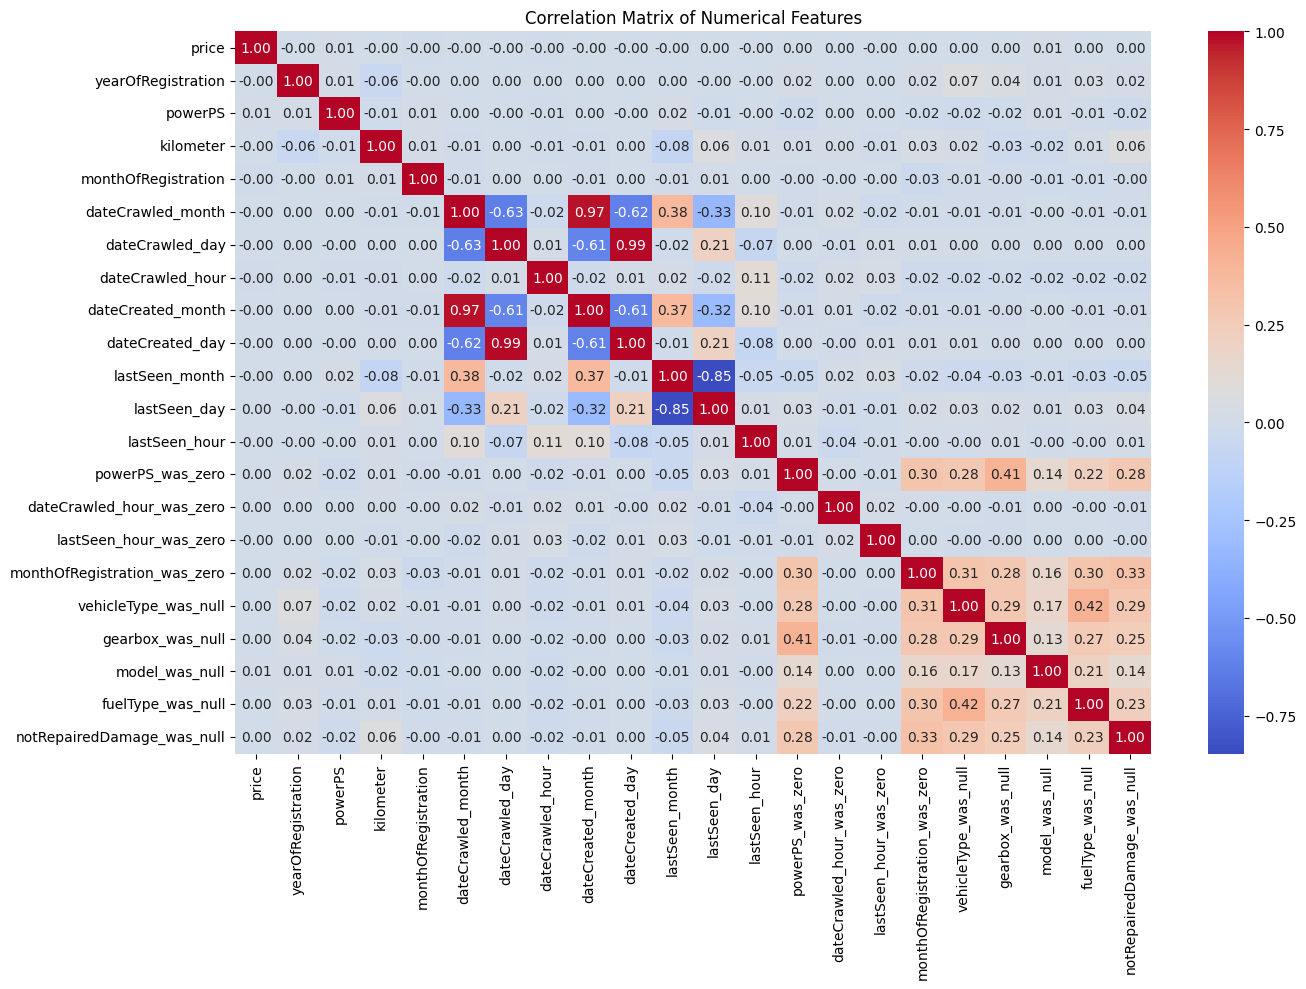

In [31]:
# Correlation matrix for numerical features
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

In [32]:
# Frequency encoding for categorical features
def frequency_encoding(df, cols):
    copy_df = df.copy()
    for col in cols:
        freq = df[col].value_counts() / len(copy_df)
        copy_df[col + '_freq_enc'] = copy_df[col].map(freq)
    copy_df.drop(columns=cols, inplace=True)
    return copy_df.T

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

encoding_df = frequency_encoding(df, categorical_cols)
encoding_df

,0,1,2,3,4,5,6,8,9,10,...,371517,371518,371519,371520,371521,371523,371524,371525,371526,371527
price,480.000000,18300.000000,9800.000000,1500.000000,3600.000000,650.000000,2200.000000,14500.000000,999.000000,2000.000000,...,7900.000000,3999.000000,5250.000000,3200.000000,1150.000000,2200.000000,1199.000000,9200.000000,3400.000000,28990.000000
yearOfRegistration,1993.000000,2011.000000,2004.000000,2001.000000,2008.000000,1995.000000,2004.000000,2014.000000,1998.000000,2004.000000,...,2010.000000,2005.000000,2016.000000,2004.000000,2000.000000,2005.000000,2000.000000,1996.000000,2002.000000,2013.000000
powerPS,116.000000,190.000000,163.000000,75.000000,69.000000,102.000000,109.000000,125.000000,101.000000,105.000000,...,140.000000,3.000000,150.000000,225.000000,116.000000,116.000000,101.000000,102.000000,100.000000,320.000000
kilometer,150000.000000,125000.000000,125000.000000,150000.000000,90000.000000,150000.000000,150000.000000,30000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,20000.000000,125000.000000,150000.000000,150000.000000,50000.000000
monthOfRegistration,6.000000,5.000000,8.000000,6.000000,7.000000,10.000000,8.000000,8.000000,6.000000,12.000000,...,7.000000,5.000000,12.000000,5.000000,3.000000,1.000000,3.000000,3.000000,6.000000,8.000000
dateCrawled_month,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,...,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
dateCrawled_day,24.000000,24.000000,14.000000,17.000000,31.000000,4.000000,1.000000,4.000000,17.000000,26.000000,...,28.000000,2.000000,9.000000,19.000000,27.000000,14.000000,5.000000,19.000000,20.000000,7.000000
dateCrawled_hour,11.000000,10.000000,12.000000,16.000000,17.000000,17.000000,20.000000,23.000000,10.000000,19.000000,...,13.000000,20.000000,13.000000,19.000000,20.000000,17.000000,19.000000,18.000000,19.000000,19.000000
dateCreated_month,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,...,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
dateCreated_day,24.000000,24.000000,14.000000,17.000000,31.000000,4.000000,1.000000,4.000000,17.000000,26.000000,...,28.000000,2.000000,9.000000,19.000000,27.000000,14.000000,5.000000,19.000000,20.000000,7.000000


In [33]:
# Remove low variance features (near constant)
def remove_low_variance_columns(df, threshold, verbose=True):
    df_cleaned = df.copy().T
    removed_columns = []

    for col in df_cleaned.select_dtypes(include='number').columns:
        variance = df_cleaned[col].var()
        if variance < threshold:
            removed_columns.append(col)
            df_cleaned.drop(columns=[col], inplace=True)
            if verbose:
                print(f"❌ Column: '{col}' → has low variance ({variance:.6f}), removed.")
        else:
            if verbose:
                print(f"✅ Column: '{col}' → as sufficient variance ({variance:.6f})")

    if verbose and not removed_columns:
        print("No columns removed.")

    return df_cleaned

df = remove_low_variance_columns(encoding_df, threshold=1e-5)

✅ Column: 'price' → as sufficient variance (13258018308083.525391)
✅ Column: 'yearOfRegistration' → as sufficient variance (6741.154749)
✅ Column: 'powerPS' → as sufficient variance (34798.301657)
✅ Column: 'kilometer' → as sufficient variance (1586958076.953022)
✅ Column: 'monthOfRegistration' → as sufficient variance (10.184585)
✅ Column: 'dateCrawled_month' → as sufficient variance (0.136582)
✅ Column: 'dateCrawled_day' → as sufficient variance (83.245071)
✅ Column: 'dateCrawled_hour' → as sufficient variance (23.210613)
✅ Column: 'dateCreated_month' → as sufficient variance (0.142703)
✅ Column: 'dateCreated_day' → as sufficient variance (83.371418)
✅ Column: 'lastSeen_month' → as sufficient variance (0.244218)
✅ Column: 'lastSeen_day' → as sufficient variance (78.085034)
✅ Column: 'lastSeen_hour' → as sufficient variance (37.750138)
✅ Column: 'powerPS_was_zero' → as sufficient variance (0.091937)
✅ Column: 'dateCrawled_hour_was_zero' → as sufficient variance (0.026357)
✅ Column: 'l

In [34]:
# Basic statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,360750.0,17811.862694,3.641156e+06,1.000000,1250.000000,3000.000000,7490.000000,2.147484e+09
yearOfRegistration,360750.0,2004.450523,8.210454e+01,1000.000000,1999.000000,2004.000000,2008.000000,9.999000e+03
powerPS,360750.0,128.458043,1.865430e+02,1.000000,86.000000,116.000000,150.000000,2.000000e+04
kilometer,360750.0,125661.663202,3.983664e+04,5000.000000,100000.000000,150000.000000,150000.000000,1.500000e+05
monthOfRegistration,360750.0,6.347529,3.191330e+00,1.000000,4.000000,6.000000,9.000000,1.200000e+01
dateCrawled_month,360750.0,3.163224,3.695703e-01,3.000000,3.000000,3.000000,3.000000,4.000000e+00
dateCrawled_day,360750.0,15.847726,9.123874e+00,1.000000,8.000000,16.000000,24.000000,3.100000e+01
dateCrawled_hour,360750.0,15.349051,4.817739e+00,1.000000,12.000000,16.000000,19.000000,2.300000e+01
dateCreated_month,360750.0,3.161026,3.777607e-01,1.000000,3.000000,3.000000,3.000000,1.200000e+01
dateCreated_day,360750.0,15.855454,9.130795e+00,1.000000,8.000000,16.000000,24.000000,3.100000e+01


In [35]:
# Additional filtering (removing unrealistic prices/years)
df = df[(df['yearOfRegistration'] >= 1950) & (df['yearOfRegistration'] <= 2024) & (df['price'] >= 1000) ]
df.describe().T # Updated stats

,count,mean,std,min,25%,50%,75%,max
price,288004.0,22110.551805,4.075093e+06,1000.000000,2200.000000,4350.000000,8950.000000,2.147484e+09
yearOfRegistration,288004.0,2004.458171,7.240917e+00,1950.000000,2001.000000,2005.000000,2009.000000,2.019000e+03
powerPS,288004.0,136.460261,1.918305e+02,1.000000,97.000000,116.000000,160.000000,2.000000e+04
kilometer,288004.0,122753.295093,4.076822e+04,5000.000000,100000.000000,150000.000000,150000.000000,1.500000e+05
monthOfRegistration,288004.0,6.397797,3.240441e+00,1.000000,4.000000,6.000000,9.000000,1.200000e+01
dateCrawled_month,288004.0,3.166036,3.721135e-01,3.000000,3.000000,3.000000,3.000000,4.000000e+00
dateCrawled_day,288004.0,15.813766,9.146909e+00,1.000000,8.000000,16.000000,24.000000,3.100000e+01
dateCrawled_hour,288004.0,15.413737,4.835121e+00,1.000000,12.000000,16.000000,19.000000,2.300000e+01
dateCreated_month,288004.0,3.163519,3.807833e-01,1.000000,3.000000,3.000000,3.000000,1.200000e+01
dateCreated_day,288004.0,15.823704,9.154231e+00,1.000000,8.000000,16.000000,24.000000,3.100000e+01


In [36]:
# Outlier removal using IQR method
def remove_outliers(df,column_list):
  result = df.copy()
  for col in column_list:
    Q1 = result[col].quantile(0.25)  # (25th percentile)
    Q3 = result[col].quantile(0.75)  # (75th percentile)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    result = result[(result[col] >= lower_bound) & (result[col] <= upper_bound)]
  return result

df = remove_outliers(df,column_list=["price","powerPS","kilometer"])

In [37]:
# Final stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,253688.0,5265.286482,4164.312969,1000.000000,2000.000000,3800.000000,7250.000000,19000.000000
yearOfRegistration,253688.0,2004.118342,6.739117,1950.000000,2001.000000,2004.000000,2008.000000,2019.000000
powerPS,253688.0,121.802608,42.519797,1.000000,90.000000,116.000000,150.000000,240.000000
kilometer,253688.0,129120.829523,33653.402317,30000.000000,125000.000000,150000.000000,150000.000000,150000.000000
monthOfRegistration,253688.0,6.407879,3.238493,1.000000,4.000000,6.000000,9.000000,12.000000
dateCrawled_month,253688.0,3.164943,0.371130,3.000000,3.000000,3.000000,3.000000,4.000000
dateCrawled_day,253688.0,15.817145,9.134770,1.000000,8.000000,16.000000,24.000000,31.000000
dateCrawled_hour,253688.0,15.443348,4.814032,1.000000,12.000000,16.000000,19.000000,23.000000
dateCreated_month,253688.0,3.162396,0.378759,1.000000,3.000000,3.000000,3.000000,12.000000
dateCreated_day,253688.0,15.825538,9.142030,1.000000,8.000000,16.000000,24.000000,31.000000


In [38]:
# Log transformation to normalize skewed target variable
def log_transform(df, columns):
  for col in columns:
    df[col + '_log'] = np.log1p(df[col])
    df = df.drop([col], axis=1)

log_transform(df, columns=["price"])

In [39]:
# Prepare features and target variable
y = df['price_log']
X = df.drop(['price_log'], axis=1)

In [40]:
# Fit linear regression model (no train-test split)
reg_model = LinearRegression().fit(X, y)

In [41]:
# Regression coefficients
print("Intercept (bias):", reg_model.intercept_)
print("Coefficients (weights):", reg_model.coef_)

Intercept (bias): -9.157007721348014
Coefficients (weights): [ 1.56291804e-04  8.22121133e-03  1.14076026e-03 -1.11200615e-06
  7.14374973e-04 -1.46278770e-02 -1.27762092e-03  5.30975305e-04
 -7.53211162e-03  5.07374655e-04  5.47326703e-02  1.59628130e-03
 -1.41300193e-05 -4.39077955e-02  7.73859886e-03 -1.75560389e-03
 -3.85701309e-02 -8.87443398e-02  3.57930007e-02 -7.77770199e-03
  2.19880629e-04 -3.03249501e-02 -4.88342001e-02 -1.18963751e-01
  1.32929708e-02  1.00983457e-01 -1.63579962e-01  1.04436096e-01
  1.41409980e-01]


In [42]:
# Evaluate model (on full data)
# MSE RMSE MAE R-Squared
y_pred = reg_model.predict(X)
print("MSE: ",mean_squared_error(y, y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y, y_pred)))
print("MAE: ",mean_absolute_error(y, y_pred))
print("R²: ",reg_model.score(X, y))

MSE:  0.07201077425135288
RMSE:  0.2683482331809786
MAE:  0.2240533525592735
R²:  0.8812301206110519


In [43]:
# Mean and standard deviation of target
print("Arithmetic Mean: ", y.mean())
print("Standart Deviation: ", y.std())

Arithmetic Mean:  8.27188898144052
Standart Deviation:  0.7786574415372755


In [44]:
# Train-Test split for realistic model evaluation
# Multiple Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=14)
reg_model = LinearRegression().fit(X_train, y_train)

# Coefficients
print("Intercept (bias):", reg_model.intercept_)
print("Coefficients (weights):", reg_model.coef_)

Intercept (bias): -8.944163135222116
Coefficients (weights): [ 1.56439156e-04  8.11220009e-03  1.13530067e-03 -1.11235171e-06
  7.38265718e-04 -1.68231271e-02 -1.33784246e-03  5.25015069e-04
 -4.75502496e-03  5.91643411e-04  5.49216294e-02  1.58754961e-03
  9.66866698e-06 -4.56534979e-02  8.02147831e-03 -1.85619667e-03
 -3.92768771e-02 -8.66839697e-02  3.46585473e-02 -7.42673540e-03
  2.63754874e-03 -2.93394075e-02 -4.27941013e-02 -1.19596842e-01
  1.30241553e-02  1.07058938e-01 -1.63712451e-01  1.08128663e-01
  1.40599615e-01]


In [45]:
# Train performance
# Train MSE RMSE MAE R-Squared
y_pred = reg_model.predict(X_train)
print("Train MSE: ", mean_squared_error(y_train, y_pred))
print("Train RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred)))
print("Train MAE: ", mean_absolute_error(y_train, y_pred))
print("Train R²: ",reg_model.score(X_train, y_train))

Train MSE:  0.07203504740089887
Train RMSE:  0.26839345633025197
Train MAE:  0.22415713407993712
Train R²:  0.8810732731564676


In [46]:
# Test performance
# Test MSE RMSE MAE R-Squared
y_pred = reg_model.predict(X_test)
print("Test MSE: ", mean_squared_error(y_test, y_pred))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test MAE: ", mean_absolute_error(y_test, y_pred))
print("Test R²: ",reg_model.score(X_test, y_test))

Test MSE:  0.07192264965049967
Test RMSE:  0.2681839847017336
Test MAE:  0.22363735597679182
Test R²:  0.8818396948503223


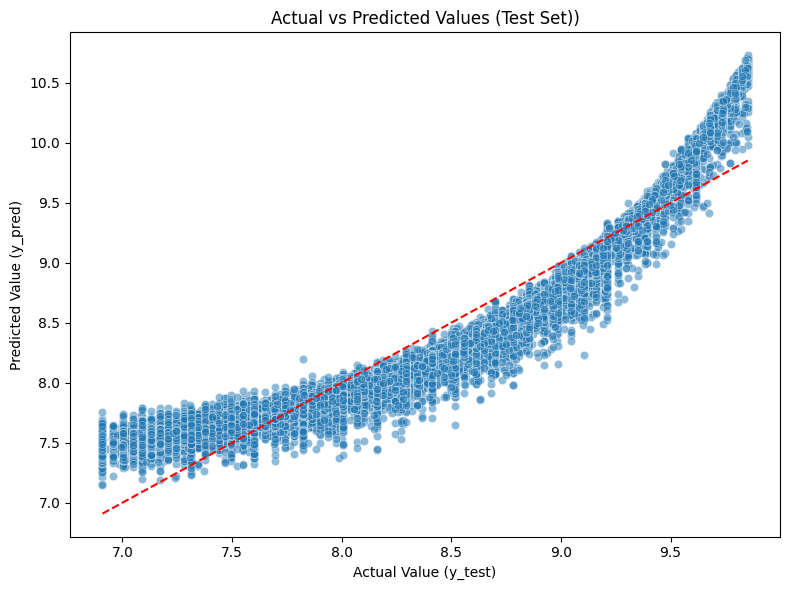

In [47]:
# Visualization: Predicted vs Actual prices (log-transformed)
y_pred = reg_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Value (y_test)")
plt.ylabel("Predicted Value (y_pred)")
plt.title("Actual vs Predicted Values (Test Set))")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # reference line
plt.tight_layout()
plt.show()

In [51]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# Cross-validation (10 folds)
cv_value = 10

# MSE scores (note: we take the negative of "neg_mean_squared_error")
cv_scores_mse = -cross_val_score(reg_model, X, y, cv=cv_value, scoring='neg_mean_squared_error')

# RMSE scores (take sqrt of each fold's MSE)
cv_scores_rmse = np.sqrt(cv_scores_mse)

# MAE scores (also negative scoring function, so we negate it)
cv_scores_mae = -cross_val_score(reg_model, X, y, cv=cv_value, scoring='neg_mean_absolute_error')

# R² scores
cv_scores_r2 = cross_val_score(reg_model, X, y, cv=cv_value, scoring='r2')


# 📊 Print all metrics
print(f"🔎 Cross-Validation Results ({cv_value}-Fold):\n")

print(f"MSE scores: {cv_scores_mse}\n")
print(f"Mean MSE: {cv_scores_mse.mean():.4f}\n")

print(f"RMSE scores: {cv_scores_rmse}\n")
print(f"Mean RMSE: {cv_scores_rmse.mean():.4f}\n")

print(f"MAE scores: {cv_scores_mae}\n")
print(f"Mean MAE: {cv_scores_mae.mean():.4f}\n")

print(f"R² scores: {cv_scores_r2}\n")
print(f"Mean R²: {cv_scores_r2.mean():.4f}\n")

🔎 Cross-Validation Results (10-Fold):

MSE scores: [0.07212351 0.07118668 0.07210022 0.07154537 0.07229878 0.07249736
 0.07312113 0.07112773 0.07262258 0.07169944]

Mean MSE: 0.0720

RMSE scores: [0.2685582  0.26680831 0.26851485 0.26747967 0.26888433 0.26925335
 0.2704092  0.26669782 0.26948578 0.2677675 ]

Mean RMSE: 0.2684

MAE scores: [0.22366781 0.22276734 0.22469769 0.22313055 0.22448864 0.22504809
 0.22583165 0.22180167 0.22560966 0.22379873]

Mean MAE: 0.2241

R² scores: [0.88100966 0.88277145 0.88042583 0.88177154 0.88009551 0.88103465
 0.87968738 0.88299892 0.88099207 0.88109283]

Mean R²: 0.8812



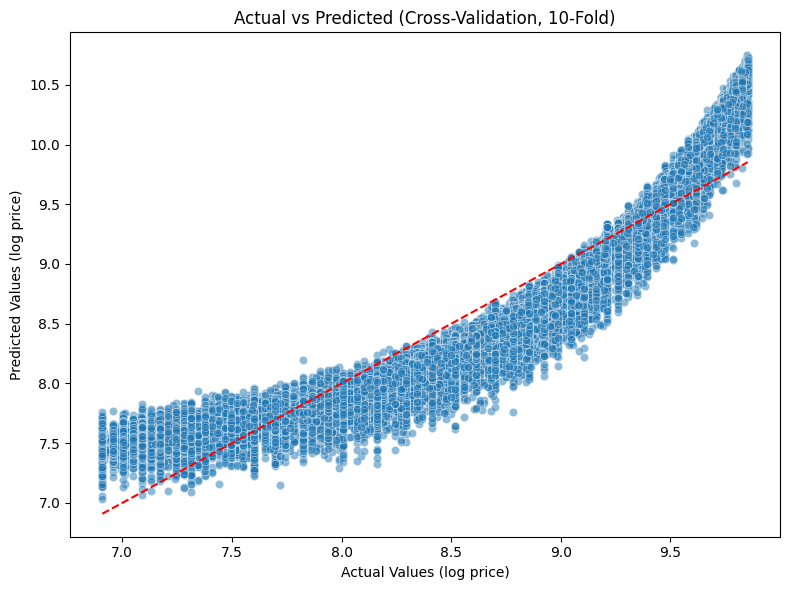

In [52]:
# Get predictions from cross-validation (on the full dataset)
y_cv_pred = cross_val_predict(reg_model, X, y, cv=cv_value)

# Scatter plot: Actual vs Predicted (cross-validation)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_cv_pred, alpha=0.5)
plt.xlabel("Actual Values (log price)")
plt.ylabel("Predicted Values (log price)")
plt.title(f"Actual vs Predicted (Cross-Validation, {cv_value}-Fold)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')  # identity line
plt.tight_layout()
plt.show()


In [53]:
import joblib

# Save the trained model to a file
joblib.dump(reg_model, "used_car_rf_model.pkl")
print("Model saved as 'used_car_rf_model.pkl'")

Model saved as 'used_car_rf_model.pkl'
